## Sentiment Analysis & Topic Detection for global Newspaper Articles

This is the final workbook, which ties everything of the project together. At first the data preprocessing pipeline is called for three selected words. [Trump, Brexit, Syria]. All Articles containing these words are selected.

Afterwards the models are applied: The Sentiment analysis finding out the tendencies of each newspaper article and the LDA to detect the topics. The LDA analysis to find out the exact amount of topics was carried out in separate workbooks.

In the bottom part of the notebook a visualization tool is presented, that shows the findings of each model and allows the analysis of the findings.

In [1]:
## Library Imports
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from lda_utils import *


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Preprocessing Pipelines and filtering Articles

In [2]:
## The preprocessing pipeline for the filter_word "Trump"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Trump"]
%time articles_t, tokenized_t = tt.preprocessing(directory="articles", verbose= True, remove_words=remove_tokens, filter_words=filter_words)
trump_df = pd.DataFrame.from_dict(articles_t)

We're at 0.0% of the data.
We're at 2.51% of the data.
We're at 5.01% of the data.
We're at 7.52% of the data.
We're at 10.03% of the data.
We're at 12.53% of the data.
We're at 15.04% of the data.
We're at 17.54% of the data.
We're at 20.05% of the data.
We're at 22.56% of the data.
We're at 25.06% of the data.
We're at 27.57% of the data.
We're at 30.08% of the data.
We're at 32.58% of the data.
We're at 35.09% of the data.
We're at 37.59% of the data.
We're at 40.1% of the data.
We're at 42.61% of the data.
We're at 45.11% of the data.
We're at 47.62% of the data.
We're at 50.13% of the data.
We're at 52.63% of the data.
We're at 55.14% of the data.
We're at 57.65% of the data.
We're at 60.15% of the data.
We're at 62.66% of the data.
We're at 65.16% of the data.
We're at 67.67% of the data.
We're at 70.18% of the data.
We're at 72.68% of the data.
We're at 75.19% of the data.
We're at 77.7% of the data.
We're at 80.2% of the data.
We're at 82.71% of the data.
We're at 85.22% of the

In [43]:
## The preprocessing pipeline for the filter_word "Brexit"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Brexit"]
%time articles_b, tokenized_b = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
brexit_df = pd.DataFrame.from_dict(articles_b)

CPU times: user 2min 32s, sys: 34 s, total: 3min 6s
Wall time: 3min 14s


In [44]:
## The preprocessing pipeline for the filter_word "Syria"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Syria"]
%time articles_s, tokenized_s = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
syria_df = pd.DataFrame.from_dict(articles_s)

CPU times: user 56.2 s, sys: 13 s, total: 1min 9s
Wall time: 1min 12s


### Applied Models (Sentiment Analysis & LDA)

In [5]:
# returns the topic with the highest probability
def get_topic_doc(lda_model, corpus, idx):
    temp_list = lda_model[corpus[idx]].copy() # this copy is essential as the model computes the probs with slight diffs
    prob_list = [i[1] for i in temp_list] # construct a flattened list with all probs
    
    return temp_list[np.argmax(prob_list)][0] #take the highest probability and return the topic

In [6]:
# LDA for "Trump"
dictionary_LDA_t = dictionary_LDA(tokenized_t) # create an LDA Dictionary
corpus_t = corpus(dictionary_LDA_t, tokenized_t) # create the corpus

# intitializing a LDA model with 14 topics using the 0.01 as eta and alpha -> refer to the respective notebook
lda_model_trump = LDA_model(corpus_t, 14, dictionary_LDA_t)

In [7]:
# adding each topic and the filter_word to the df
trump_df["topic"] = [get_topic_doc(lda_model_trump, corpus_t, row) for row in range(trump_df.shape[0])]
trump_df["filter_word"] = "trump"

In [8]:
# LDA for "Syria"
dictionary_LDA_s = dictionary_LDA(tokenized_s) 
corpus_s = corpus(dictionary_LDA_s, tokenized_s) 

# intitializing a LDA model with 6 topics using 0.8 as eta and 0.11 as alpha -> refer to the respective notebook
lda_model_syria = LDA_model(corpus_s, 6, dictionary_LDA_s, eta=0.8, alpha=0.11)

In [9]:
# adding each topic and the filter_word to the df
syria_df["topic"] = [get_topic_doc(lda_model_syria, corpus_s, row) for row in range(syria_df.shape[0])]
syria_df["filter_word"] = "syria"

In [10]:
# LDA for "Brexit"
dictionary_LDA_b = dictionary_LDA(tokenized_b) 
corpus_b = corpus(dictionary_LDA_b, tokenized_b) 

# intitializing a LDA model with 7 topics using the standard values for eta and alpha -> refer to the respective notebook
lda_model_brexit = LDA_model(corpus_b, 7, dictionary_LDA_b, eta=0.01, alpha=0.01)

In [11]:
# adding each topic and the filter_word to the df
brexit_df["topic"] = [get_topic_doc(lda_model_brexit, corpus_b, row) for row in range(brexit_df.shape[0])]
brexit_df["filter_word"] = "brexit"

In [12]:
# merge the dataframes
frames = [trump_df, syria_df, brexit_df]
articles_df = pd.concat(frames)
articles_df = articles_df.reset_index()
articles_df["topic_label"] = articles_df["filter_word"] + "_" + articles_df["topic"].map(str) # get a combined label

In [13]:
# apply sentiment analysis
sia = SentimentIntensityAnalyzer()
articles_df = articles_df.merge(
    articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))
    ), left_index=True, right_index=True)

In [45]:
# get all unique values for that column to pass as options to the viz
topics = articles_df.topic_label.unique()
filter_words = ["Brexit", "Trump", "Syria"]

In [15]:
articles_df.head()

,index,author,newspaper,text,title,url,topic,filter_word,topic_label,neg,neu,pos,compound
0,0,[],breitbart,WASHINGTON (AP) — Democrats intensified their ...,"Dems mock ‘scaredy-cat’ GOP, demand Mueller’s ...",https://www.breitbart.com/news/dems-mock-scare...,13,trump,trump_13,0.062,0.865,0.074,0.9138
1,1,[],nbcnews,Breaking News Emails Get breaking news alerts ...,"Federal judge overrules Trump order, restores ...",https://www.nbcnews.com/news/us-news/federal-j...,8,trump,trump_8,0.015,0.890,0.095,0.9844
2,2,[],breitbart,March 26 (UPI) — A Boeing 737 Max 8 airliner m...,Boeing 737 Max 8 makes emergency landing in Or...,https://www.breitbart.com/news/boeing-737-max-...,4,trump,trump_4,0.091,0.886,0.023,-0.9674
3,3,[Sanjana Karanth],yahoo,President Donald Trump said Wednesday night th...,Trump: Mueller Probe 'Would Not Have Happened'...,https://news.yahoo.com/trump-mueller-probe-apo...,13,trump,trump_13,0.062,0.844,0.094,0.8468
4,4,[Andrew Buncombe],yahoo,So we now know what Donald Trump’s 2020 re-ele...,Mueller's report is a massive win for Trump an...,https://news.yahoo.com/mueller-apos-report-mas...,13,trump,trump_13,0.086,0.807,0.107,0.9394


### Color palette for the selected newspapers

In [16]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

__Get topics to be displayed__

In [68]:
x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

trump house president democrats republicans congress republican wall senate border
smollett chicago police case jussie charges attack actor trump prosecutors
israel netanyahu israeli trump venezuela military gaza president golan maduro
trump president russian campaign former 2016 fbi 2018 russia officials
north trump sanctions korea president united states boeing nuclear administration
percent mccain trump market last since week yield recession growth
china trade oil chinese trump year billion beijing tariffs president
mueller trump report barr president counsel investigation special attorney justice
health trump care court law administration obamacare president new people
percent new trump democrats special president funding olympics deal green
may fed brexit syria deal last eu britain parliament state
border mexico trump immigration el migrants states united paso illegal
new trump — one people like president first democratic us
trump mueller president report news collusion — russia i

In [71]:
topics_dict = {"":""}

x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["trump_"+str(index)] = " ".join(words)

x = lda_model_syria.show_topics(num_topics=6, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["syria_"+str(index)] = " ".join(words)
  
x = lda_model_brexit.show_topics(num_topics=7, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["brexit_"+str(index)] = " ".join(words)

topics_dict

{'': '',
 'trump_0': 'trump house president democrats republicans congress republican wall senate border',
 'trump_1': 'smollett chicago police case jussie charges attack actor trump prosecutors',
 'trump_2': 'israel netanyahu israeli trump venezuela military gaza president golan maduro',
 'trump_3': 'trump president russian campaign former 2016 fbi 2018 russia officials',
 'trump_4': 'north trump sanctions korea president united states boeing nuclear administration',
 'trump_5': 'percent mccain trump market last since week yield recession growth',
 'trump_6': 'china trade oil chinese trump year billion beijing tariffs president',
 'trump_7': 'mueller trump report barr president counsel investigation special attorney justice',
 'trump_8': 'health trump care court law administration obamacare president new people',
 'trump_9': 'percent new trump democrats special president funding olympics deal green',
 'trump_10': 'may fed brexit syria deal last eu britain parliament state',
 'trump_11

In [146]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.4])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    # Slice the dataframe based on the word and the topic
    if drop_topics.value == "":
        df = articles_df[articles_df.text.str.contains(drop_words.value)] 
    else:
        df = articles_df[articles_df.text.str.contains(drop_words.value)]
        df = df[df["topic_label"] == drop_topics.value]
        

    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "" :
        reg = LinearRegression()
        reg_articles = df[df.newspaper.isin([drop_newspapers.value])]
        if reg_articles.shape[0] > 0:
            reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
            abline(reg.coef_, reg.intercept_)

    #Plot the scatter plot
    sns.scatterplot(data=df[~df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=df[df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    if centroid.value:
        centers = df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
    if len(df) != 0:
        topic_bar.value = str(int(df.text.str.len().mean())) 
        if drop_newspapers.value != '':
            newspaper_bar.value = articles_df[articles_df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
            topic_newspaper_bar.value = df[df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
    textArea.value = "Showing data for newspaper: " + drop_newspapers.value + "\nRelating: "+ drop_words.value+'\n'
    textArea.value += "Topic: " + topics_dict[drop_topics.value]

## UI components

In [147]:
##### Ipython UI components
drop_words = widgets.Dropdown(
    options=np.append(filter_words, [""]),
    description='Word:',
    value="",
    layout=widgets.Layout(width='40%')
)
drop_topics = widgets.Dropdown(
    options=np.append(topics, [""]),
    description='Topics:',
    value="",
    layout=widgets.Layout(width='40%')
)

info_label = widgets.Label(
    value="Average length of the article per:"
)

topic_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Topic:',
    bar_style='info', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Newspaper:',
    bar_style='success', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
topic_newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Paper Topic:',
    bar_style='warning', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
textArea = widgets.Textarea(
    value='',
    layout=widgets.Layout(width='40%', height='120px'),
    description = "Other Info:",
    disabled=True,
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value="",
    layout=widgets.Layout(width='40%')
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)
drop_words.observe(action)
drop_topics.observe(action)


# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
bars = widgets.VBox([item for item in [info_label, topic_bar, newspaper_bar, topic_newspaper_bar]],layout=widgets.Layout(width='42.5%'))
info_area = widgets.HBox([item for item in [bars, textArea]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])


/opt/conda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


## Render the whole thing

Box(children=(Dropdown(description='Word:', index=3, layout=Layout(width='40%'), options=('Brexit', 'Trump', '…

Box(children=(Dropdown(description='Newspaper:', index=17, layout=Layout(width='40%'), options=('breitbart', '…

<IPython.core.display.Javascript object>


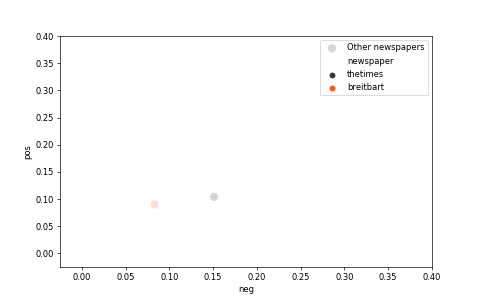

In [148]:
# Display the widgets
display(items_lda)
display(info_area)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop_newspapers.value)